In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['earphones', 'headphones', 'Phone']
Types of classes labels found:  3


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                           image
0  earphones  dataset_path/earphones/e10.jpg
1  earphones  dataset_path/earphones/e11.jpg
2  earphones  dataset_path/earphones/e13.jpg
3  earphones  dataset_path/earphones/e14.jpg
4  earphones  dataset_path/earphones/e15.jpg
    Labels                       image
154  Phone  dataset_path/Phone/p60.jpg
155  Phone  dataset_path/Phone/p61.jpg
156  Phone   dataset_path/Phone/p7.jpg
157  Phone   dataset_path/Phone/p8.jpg
158  Phone   dataset_path/Phone/p9.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  159
Labels
headphones    59
Phone         59
earphones     41
Name: count, dtype: int64


In [ ]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(159, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'earphones'
 'earphones' 'earphones' 'earphones' 'earphones' 'earphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones' 'headphones' 'headphones' 'headphones'
 'headphones' 'headphones'

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(151, 224, 224, 3)
(151, 3)
(8, 224, 224, 3)
(8, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)


In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 3)                 4053414   
 )                                                               
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
5/5 - 103s - loss: 0.5903 - accuracy: 0.8278 - 103s/epoch - 21s/step
Epoch 2/30
5/5 - 62s - loss: 1.1226 - accuracy: 0.8477 - 62s/epoch - 12s/step
Epoch 3/30
5/5 - 60s - loss: 0.7882 - accuracy: 0.8411 - 60s/epoch - 12s/step
Epoch 4/30
5/5 - 61s - loss: 0.9267 - accuracy: 0.8543 - 61s/epoch - 12s/step
Epoch 5/30
5/5 - 60s - loss: 0.

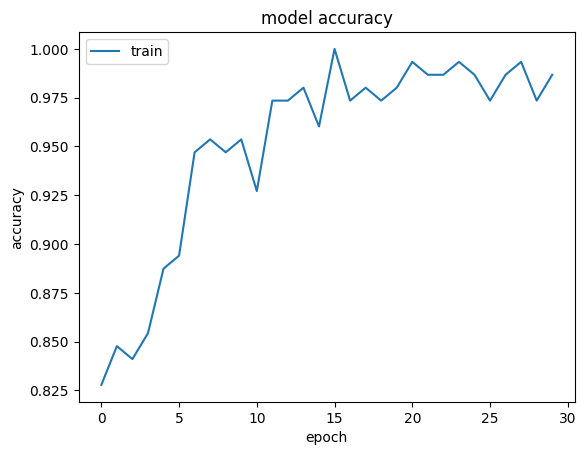

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 4s 4s/step - loss: 6.4142 - accuracy: 0.2500
Loss = 6.414150238037109
Test Accuracy = 0.25


Input image shape: (1, 224, 224, 3)


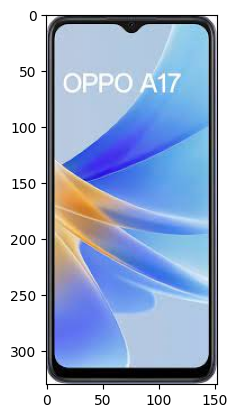

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'C:/Users/DELL/Desktop/Dataset/Phone/p1.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 4s 4s/step


array([[0., 0., 1.]], dtype=float32)

In [ ]:
# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
5/5 - 63s - loss: 0.0778 - accuracy: 0.9801 - 63s/epoch - 13s/step
Epoch 2/30
5/5 - 60s - loss: 0.0097 - accuracy: 1.0000 - 60s/epoch - 12s/step
Epoch 3/30
5/5 - 60s - loss: 0.0363 - accuracy: 0.9868 - 60s/epoch - 12s/step
Epoch 4/30
5/5 - 60s - loss: 0.0670 - accuracy: 0.9868 - 60s/epoch - 12s/step
Epoch 5/30
5/5 - 62s - loss: 0.0121 - accuracy: 1.0000 - 62s/epoch - 12s/step
Epoch 6/30
5/5 - 61s - loss: 0.0616 - accuracy: 0.9735 - 61s/epoch - 12s/step
Epoch 7/30
5/5 - 61s - loss: 0.0872 - accuracy: 0.9603 - 61s/epoch - 12s/step
Epoch 8/30
5/5 - 60s - loss: 0.0179 - accuracy: 1.0000 - 60s/epoch - 12s/step
Epoch 9/30
5/5 - 62s - loss: 0.0849 - accuracy: 0.9801 - 62s/epoch - 12s/step
Epoch 10/30
5/5 - 61s - loss: 0.0827 - accuracy: 0.9735 - 61s/epoch - 12s/step
Epoch 11/30
5/5 - 62s - loss: 0.0424 - accuracy: 0.9801 - 62s/epoch - 12s/step
Epoch 12/30
5/5 - 60s - loss: 0.0137 - accuracy: 0.9934 - 60s/epoch - 12s/step
Epoch 13/30
5/5 - 60s - loss: 0.0093 - accuracy: 1.0000 - 60s

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
5/5 - 60s - loss: 0.0993 - accuracy: 0.9669 - 60s/epoch - 12s/step
Epoch 2/30
5/5 - 60s - loss: 0.0568 - accuracy: 0.9801 - 60s/epoch - 12s/step
Epoch 3/30
5/5 - 62s - loss: 0.0284 - accuracy: 0.9934 - 62s/epoch - 12s/step
Epoch 4/30
5/5 - 60s - loss: 0.0379 - accuracy: 0.9868 - 60s/epoch - 12s/step
Epoch 5/30
5/5 - 61s - loss: 0.1521 - accuracy: 0.9801 - 61s/epoch - 12s/step
Epoch 6/30
5/5 - 61s - loss: 0.0638 - accuracy: 0.9735 - 61s/epoch - 12s/step
Epoch 7/30
5/5 - 60s - loss: 0.0324 - accuracy: 0.9934 - 60s/epoch - 12s/step
Epoch 8/30
5/5 - 60s - loss: 0.0357 - accuracy: 0.9934 - 60s/epoch - 12s/step
Epoch 9/30
5/5 - 64s - loss: 0.0429 - accuracy: 0.9868 - 64s/epoch - 13s/step
Epoch 10/30
5/5 - 62s - loss: 0.0153 - accuracy: 1.0000 - 62s/epoch - 12s/step
Epoch 11/30
5/5 - 60s - loss: 0.0067 - accuracy: 1.0000 - 60s/epoch - 12s/step
Epoch 12/30
5/5 - 60s - loss: 0.0663 - accuracy: 0.9868 - 60s/epoch - 12s/step
Epoch 13/30
5/5 - 61s - loss: 0.0040 - accuracy: 1.0000 - 61s